1.Introduction
This assignment will help you to consolidate the concepts learnt in the session.
2.Problem Statement
This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker, Data Mining and 
Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
Extraction was done by Barry Becker from the 1994 Census database. A set of 
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to 
determine whether a person makes over 50K a year. Conversion of original data as 
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian 
noninstitutional population of the US. These are prepared monthly for us by Population 
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1.A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted 
tallies" of any specified socio-economic characteristics of the population. People with 
similar demographic characteristics should have similar weights. There is one important 
caveat to remember about this statement. That is that since the CPS sample is actually a 
collection of 51 state samples, each with its own probability of selection, the statement 
only applies within state.
Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
Problem 2:
Which factors are important
Problem 3:
Which algorithms are best for this dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
df = pd.read_csv(url,names=columns)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.shape

(32561, 15)

In [9]:
df.size

488415

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
df.replace(' ?',np.nan,inplace=True)

In [14]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [15]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [16]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
df = df.replace({' <=50K':0,' >50K':1})

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

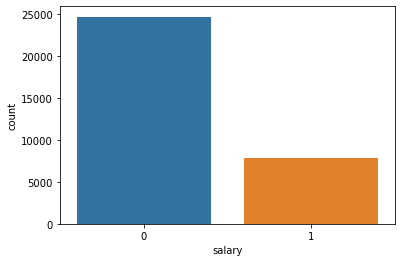

In [18]:
sns.countplot(df['salary'])

In [19]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [20]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [21]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [22]:
df= df.replace(' Without-pay', ' Never-worked')

In [24]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Never-worked')])

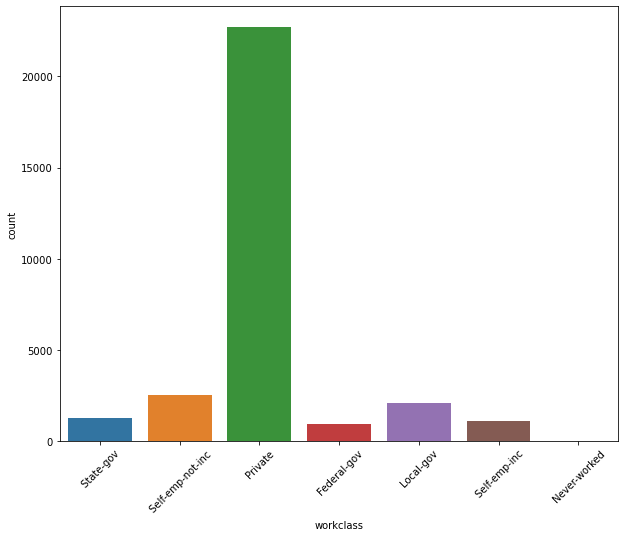

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=45)

In [26]:
df['workclass'].fillna('0',inplace=True)

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, '0'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Never-worked')])

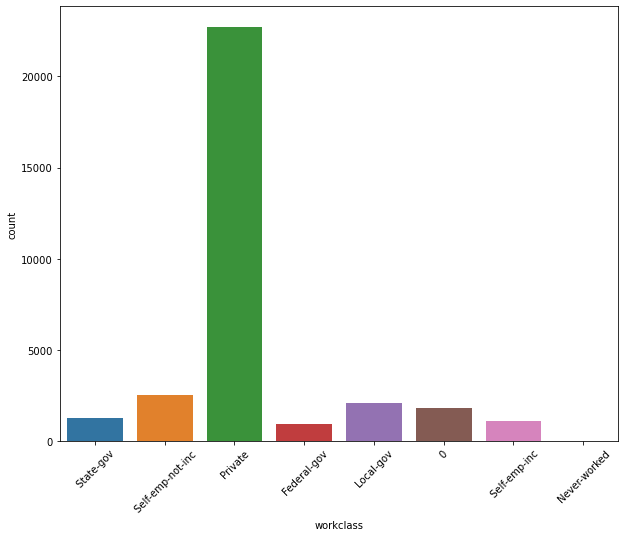

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=45)

In [28]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [29]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

df['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

In [30]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

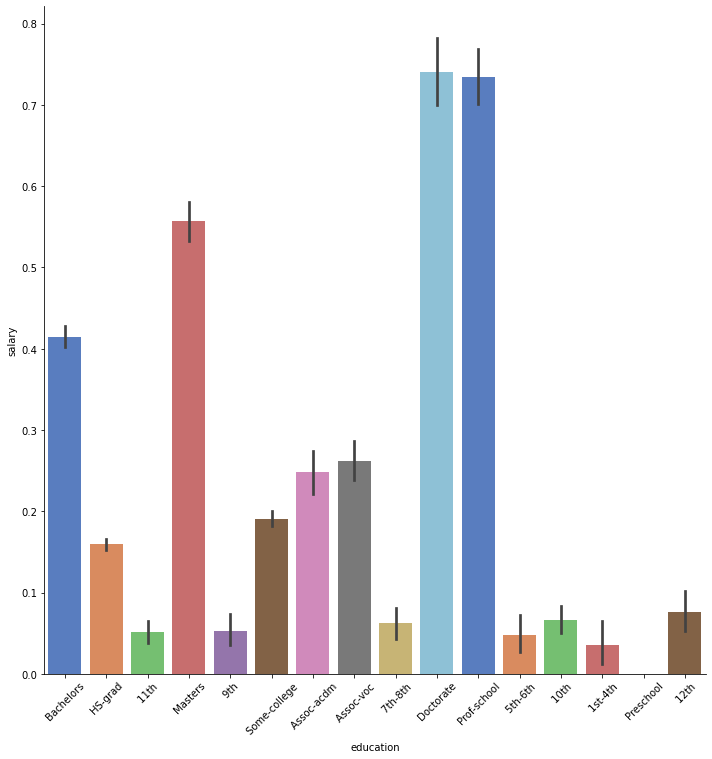

In [31]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=45)

In [32]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [33]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, 'Primary'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' Some-college'),
  Text(5, 0, ' Assoc-acdm'),
  Text(6, 0, ' Assoc-voc'),
  Text(7, 0, ' Doctorate'),
  Text(8, 0, ' Prof-school'),
  Text(9, 0, ' Preschool')])

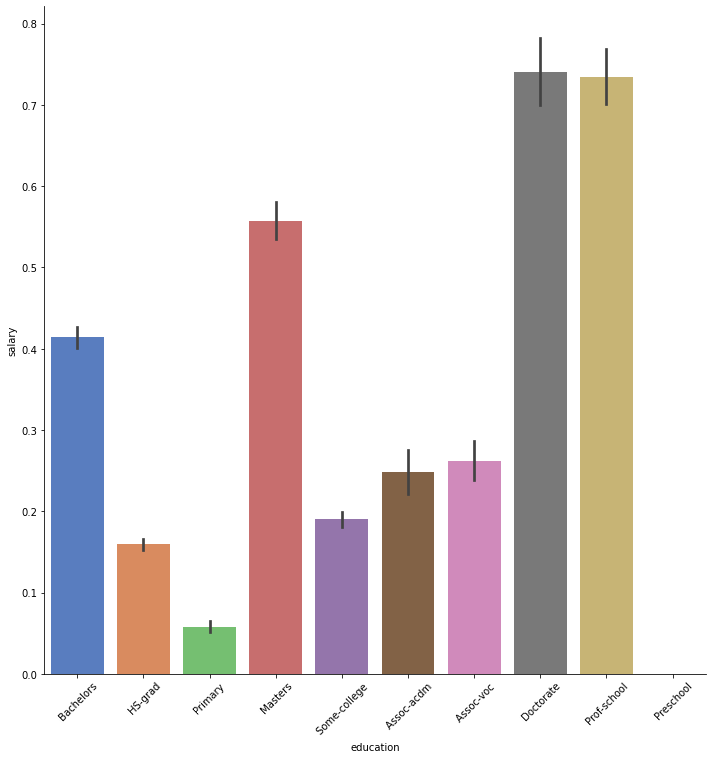

In [34]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=45)

In [35]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [36]:
df['marital-status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Widowed')])

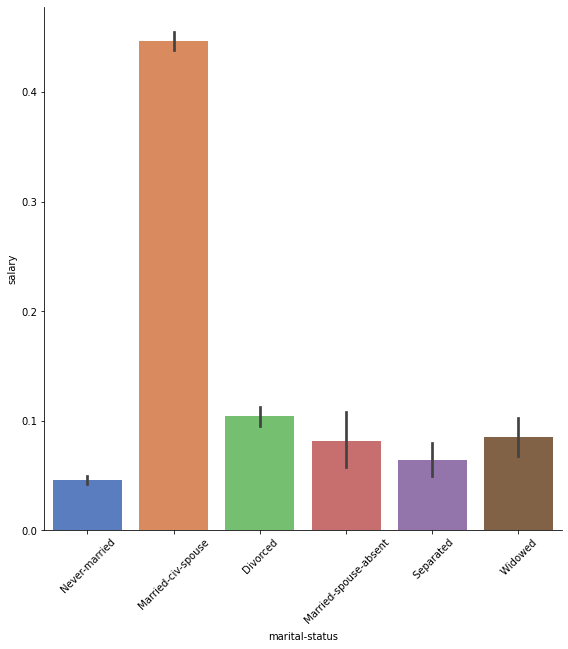

In [37]:
sns.catplot(x='marital-status',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=45)

In [38]:
df['occupation'].fillna('0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [39]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, '0'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv')])

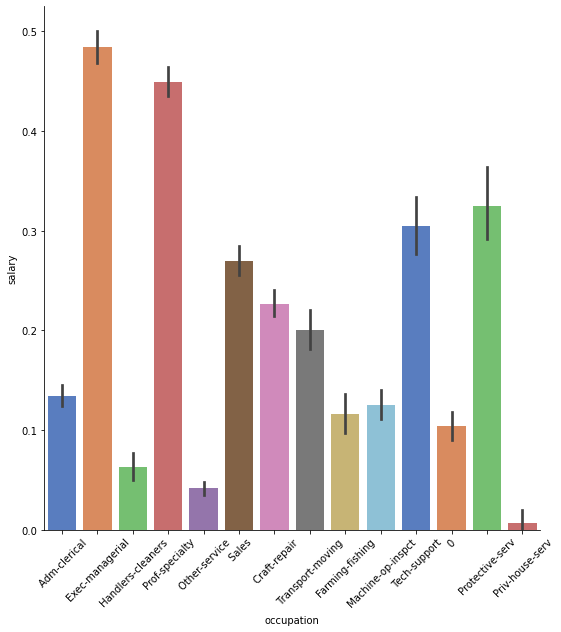

In [40]:
sns.catplot(x='occupation',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=45)

In [41]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [42]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [43]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [44]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [45]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [46]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [47]:
df['native-country'] = df['native-country'].apply(native)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'North_America'),
  Text(1, 0, 'Central_America'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'South_America'),
  Text(4, 0, 'EU')])

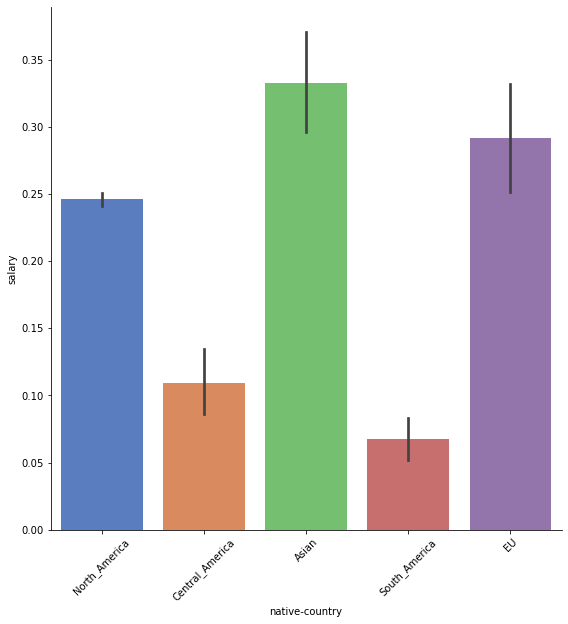

In [48]:
sns.catplot(x='native-country',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=45)

<AxesSubplot:>

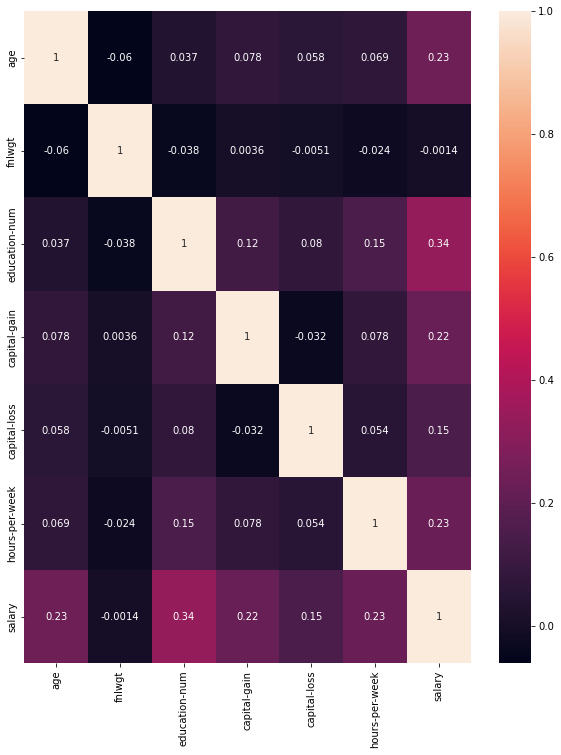

In [49]:
corr = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

In [50]:
df.drop('fnlwgt',axis=1,inplace=True)

In [51]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North_America,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,0
3,53,Private,Primary,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Central_America,0


In [52]:
X = df.drop('salary',axis=1)
y = df['salary']

In [53]:
X.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [54]:
X_d = pd.get_dummies(X) # Categorial to numerical data

In [55]:
X_d.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_Asian,native-country_Central_America,native-country_EU,native-country_North_America,native-country_South_America
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_d,y,test_size=0.3,random_state=42)

In [57]:
x_train.shape

(22792, 61)

In [58]:
x_test.shape

(9769, 61)

In [59]:
y_train.shape

(22792,)

In [60]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

C:\Users\amits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
# Hyperparameter tuning of LR
penalty = ['l1', 'l2']
# C is the inverse of regularization parameter
C = np.logspace(0, 4, 10)
random_state=[0]
# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, 
                  random_state=random_state)

In [62]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(Lr,param_grid=hyperparameters,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\amits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\amits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'random_state': [0]},
             verbose=3)

In [63]:
gsv.best_params_

{'C': 1.0, 'penalty': 'l2', 'random_state': 0}

In [67]:
lr_tuned = LogisticRegression(C=1.0,penalty='l2',random_state=0)

In [68]:
lr_tuned.fit(x_train,y_train)

C:\Users\amits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [69]:
Log_Reg =lr_tuned.score(x_test,y_test)

In [70]:
lr_y_pred = lr_tuned.predict(x_test)

In [71]:
# Evaluating Linear Regression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc
print(f"Accuracy_Score:{accuracy_score(y_test,lr_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,lr_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,lr_y_pred)}")

Accuracy_Score:0.8436892210052206
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7455
           1       0.72      0.56      0.63      2314

    accuracy                           0.84      9769
   macro avg       0.80      0.75      0.76      9769
weighted avg       0.84      0.84      0.84      9769

**************************************************
Confusion_Matrix:[[6949  506]
 [1021 1293]]


In [72]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [74]:
gsv_dtc = GridSearchCV(dtc,param_grid=grid_param,cv=5,verbose=3,n_jobs=-1)
gsv_dtc.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [75]:
gsv_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'splitter': 'best'}

In [76]:
dtc_tuned = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5,min_samples_split=9,splitter='best')

In [77]:
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=9)

In [78]:
Dtc = dtc_tuned.score(x_test,y_test)

In [79]:
dtc_y_pred = dtc_tuned.predict(x_test)

In [80]:
# Evaluating Decision Tree Classifier Model

print(f"Accuracy_Score:{accuracy_score(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,dtc_y_pred)}")

Accuracy_Score:0.8566895280990889
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7455
           1       0.75      0.59      0.66      2314

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7005  450]
 [ 950 1364]]


In [81]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
grid_params = {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [83]:
gsv = GridSearchCV(rfc,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 15, 25, 30]},
             verbose=3)

In [84]:
gsv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 30}

In [85]:
rfc_tuned = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_leaf=3,min_samples_split=7,n_estimators=30)

In [86]:
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=30)

In [87]:
RFC = rfc_tuned.score(x_test,y_test)

In [88]:
# Evaluating RFC

rfc_y_pred = rfc_tuned.predict(x_test)

In [89]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8560753403623708
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7455
           1       0.78      0.54      0.64      2314

    accuracy                           0.86      9769
   macro avg       0.83      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7104  351]
 [1055 1259]]


In [90]:
# KNN CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [91]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27,30],
               'n_neighbors' : [3,7,9,11]
              }

In [92]:
gsv = GridSearchCV(knc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.836 total time=   2.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.830 total time=   2.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.845 total time=   2.3s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.837 total time=   2.3s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.836 total time=   2.3s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.846 total time=   2.4s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.843 total time=   2.4s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.849 total time=   2.4s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.848 total time=   2.6s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7;, score=0.840 total t

[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.845 total time=   2.3s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.849 total time=   2.2s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.848 total time=   2.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=7;, score=0.839 total time=   1.9s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.848 total time=   2.7s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.851 total time=   3.1s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.850 total time=   4.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.851 total time=   2.4s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=9;, score=0.843 total time=   1.9s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=0.849 total time=   1.9s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11;, score=

[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.848 total time=   2.4s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.848 total time=   2.6s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.851 total time=   2.3s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.852 total time=   2.9s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=0.849 total time=   2.8s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.837 total time=   2.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.832 total time=   1.9s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.845 total time=   2.2s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.837 total time=   2.3s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.835 total time=   2.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=7;, score=0.844 total time=  

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27, 30],
                         'n_neighbors': [3, 7, 9, 11]},
             verbose=3)

In [93]:
gsv.best_params_

{'algorithm': 'brute', 'leaf_size': 18, 'n_neighbors': 11}

In [94]:
knc_tuned = KNeighborsClassifier(algorithm='brute',leaf_size=18,n_neighbors=11)
knc_tuned.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=18, n_neighbors=11)

In [95]:
KNN = knc_tuned.score(x_test,y_test)

In [96]:
knc_y_pred = knc_tuned.predict(x_test)

In [97]:
# Evaluating KNN Classifier

print(f"Accuracy_Score:{accuracy_score(y_test,knc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,knc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,knc_y_pred)}")

Accuracy_Score:0.8464530658204524
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7455
           1       0.70      0.63      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

**************************************************
Confusion_Matrix:[[6819  636]
 [ 864 1450]]


In [98]:
# XGBOOST Classifier

from xgboost import XGBClassifier
xbc = XGBClassifier()
xbc.fit(x_train,y_train)

C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [102]:
gsv = GridSearchCV(xbc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=10;, score=nan total time=   0.0s

C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 


[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=7, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.5, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=9, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=9, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=11, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=11, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=11, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.5, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=11, n_estimators=200;, score=nan total time=   0.0s

C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 


[CV 4/5] END  learning_rate=0.5, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.5, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=15, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.5, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.5, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=15, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.5, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.5, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.5, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.5, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.5, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.1, max_depth=15, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.1, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.01, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.01, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=7, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=7, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=9, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=9, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=9, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=9, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.01, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=9, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=9, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=11, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=11, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=11, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.01, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=11, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.01, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.01, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=15, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.01, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.01, max_depth=15, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.01, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.01, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.01, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.01, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.01, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.01, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=3, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=3, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=3, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.001, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=7, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=7, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=7, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=7, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=7, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=7, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=7, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=7, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=7, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=9, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=9, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=9, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=9, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=9, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.001, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=9, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=9, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=9, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=9, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=9, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 3/5] END  learning_rate=0.001, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=9, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=11, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=11, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=11, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=11, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=15, n_estimators=10;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=15, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=15, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=15, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=15, n_estimators=50;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 1/5] END  learning_rate=0.001, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=15, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=15, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END  learning_rate=0.001, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=15, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 4/5] END  learning_rate=0.001, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END  learning_rate=0.001, max_depth=15, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END  learning_rate=0.001, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 2/5] END  learning_rate=0.001, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END  learning_rate=0.001, max_depth=15, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END  learning_rate=0.001, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[CV 5/5] END  learning_rate=0.001, max_depth=15, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
750 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amits\anaconda3\lib\site-packages\xgboost\core.py", line 433, in inner_f
    return f(**kwargs)
  File "C:\Users\amits\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1176, in fit
    self._Booster = train(
  File "C:\Users\amits\anaconda3\lib\site-packages\xgboost\training.py", line 1

XGBoostError: [17:04:02] C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:550: Invalid parameter " learning_rate" contains whitespace.

In [103]:
gsv.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 10}

In [104]:
xbc_tuned = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=10)
xbc_tuned.fit(x_train,y_train)

[17:04:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
XBc = xbc_tuned.score(x_test,y_test)
print(XBc)

0.86539052103593


C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [107]:
# Evaluating XGBOOST Classifier

xbc_y_pred = xbc_tuned.predict(x_test)
print(f"Accuracy_Score:{accuracy_score(y_test,xbc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,xbc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,xbc_y_pred)}")

Accuracy_Score:0.86539052103593
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7455
           1       0.76      0.64      0.69      2314

    accuracy                           0.87      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.87      0.86      9769

**************************************************
Confusion_Matrix:[[6982  473]
 [ 842 1472]]


C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [108]:
# Preparing Table of Final results

df = {'Models':['Logistic_Reg','Decision Tree','Random Forest','KNN','XGBoost_Classifier'],'Model_Scores':[Log_Reg,Dtc,RFC,KNN,XBc]}
pd.DataFrame(df)

,Models,Model_Scores
0,Logistic_Reg,0.843689
1,Decision Tree,0.856690
2,Random Forest,0.856075
3,KNN,0.846453
4,XGBoost_Classifier,0.865391




Best MOdel is XGBOOST Classifier